In [1]:
# Useful starting lines
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import zipfile
import os
import datetime
import seaborn as sns
import pandas as pd
import cProfile
from matplotlib.mlab import PCA
from implementations import *
from costs import *
from method_comparison_helpers import *
%load_ext autoreload
%autoreload 2

## Load the training data into feature matrix, class labels, and event ids:

In [2]:
# Github does not accept files above 100mb and test.csv is 104mb
# thus we upload zip whith test.csv which needs to be extracted
with zipfile.ZipFile("../data/test.csv.zip","r") as zip_ref:
    zip_ref.extractall("../data/")

In [3]:
from proj1_helpers import *
DATA_TRAIN_PATH = '../data/train.csv' # TODO: download train data and supply path here 
y, tx, ids = load_csv_data(DATA_TRAIN_PATH)

#Lets verify loaded data
print(y.shape)
print(tx.shape)
print(ids.shape)

(250000,)
(250000, 30)
(250000,)


In [4]:
split_ratio = 0.2
tx_train, tx_test, y_train, y_test = split_data(tx, y, split_ratio)
print(tx_train.shape, y_train.shape)
print(tx_test.shape, y_test.shape)

(50000, 30) (50000,)
(200000, 30) (200000,)


In [5]:
ones = np.ones((tx.shape[0],1))
tx_with_ones = np.hstack((ones, tx))
tx_with_ones.shape

(250000, 31)

In [6]:
tx_with_ones_train, tx_with_ones_test, y_with_ones_train, y_with_ones_test = split_data(tx_with_ones, y, split_ratio)
print(tx_with_ones_train.shape, y_with_ones_train.shape)
print(tx_with_ones_test.shape, y_with_ones_test.shape)

(50000, 31) (50000,)
(200000, 31) (200000,)


# Do your thing crazy machine learning thing here :) ...

## Grading Criteria:
1. Competitive Part **(counts one third)**. The final rank of your team in the (private) leaderboard will be translated linearly to a scale from 4 to 6.
2. Code **(counts one third)**. In Python. No external libraries allowed! For this first project, we want you to implement and use the methods we have seen in class. The code will be graded by two TAs independently, according to the criteria described:
* Rules for the code part:
  * Reproducibility: In your submission, you must provide a script run.py which produces exactly the same .csv predictions which you used in your best submission to the competition on Kaggle.
  * Documentation: Your ML system must be clearly described in your PDF report and also well- documented in the code itself. A clear ReadMe file must be provided. The documentation must also include all data preparation, feature generation as well as cross-validation steps that you have used.
  * In addition to your customized system, don’t forget that your code submission must still also include the 6 basic method implementations as described above in step 2.
  * No use of external ML libraries is allowed in Project 1. (It will be allowed in Project 2).
  * No external datasets allowed.
3. Written Report **(counts one third)**. You will write a maximum 2 page PDF report on your findings, using LaTeX. The code will be graded by two TAs independently, and we will provide you feedback. The main criteria will be if you were able to correctly use, implement and describe the 6 baseline methods mentioned in Step 2 above. This counts half for the written report. In addition, we will grade you on the scientific contribution you made additionally, to improve your predictions. For this part, the criteria are
  * scientific novelty
  * creativity
  * reproducibility
  * solid comparison baselines supporting your claims – writeup quality
  

As usual, your code and report will be automatically checked for plagiarism.

# Todo's

* Exploratory data analysis with comments
* Dataset cleaning
* Comment code and this notebook
* Improve predictions to be number one in the keggle!
  * construct better features (optional)
  * implement additional modifications of basic methods implemented (optional)
  * clean and preprocess data
* LateX pdf report

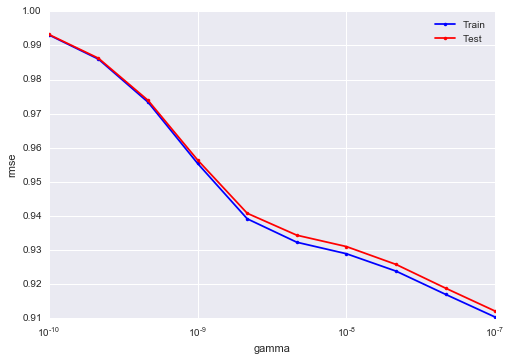

In [7]:
#Lets test some basics: Least Squares Gradient Descent

# Define the parameters of the algorithm.
max_iters = 100
gammas = np.logspace(-10, -7, 10)
train_losses = []
test_losses = []

for gamma in np.nditer(gammas):
    # Start gradient descent.
    start_time = datetime.datetime.now()
    initial_w = np.zeros(tx_with_ones_train.shape[1])
    gradient_w, train_rmse = least_squares_GD(y_with_ones_train, tx_with_ones_train, initial_w, max_iters, gamma)

    # Print result
    test_mse = compute_loss(y_with_ones_test, tx_with_ones_test, gradient_w)
    test_rmse = np.sqrt(2*test_mse)    
    
    train_losses = np.append(train_losses, train_rmse)
    test_losses = np.append(test_losses, test_rmse)
    
    end_time = datetime.datetime.now()
    exection_time = (end_time - start_time).total_seconds()
    #print("Gradient Descent: execution time={t:.3f} seconds. Train RMSE Loss={l}, Test RMSE Loss={tl}".format(t=exection_time, l=grad_loss, tl=test_rmse))
    
plt.semilogx(gammas, train_losses, marker=".", color='b', label='Train')
plt.semilogx(gammas, test_losses, marker=".", color='r', label='Test')
plt.xlabel("gamma")
plt.ylabel("rmse")
plt.grid(True)
plt.legend()

Stochastic Gradient Descent: execution time=5.057 seconds. Train RMSE=1.3903138413582976e+37, Test RMSE=1.3884173614175272e+37
Stochastic Gradient Descent: execution time=5.107 seconds. Train RMSE=0.9992754019360314, Test RMSE=0.9992884967292476


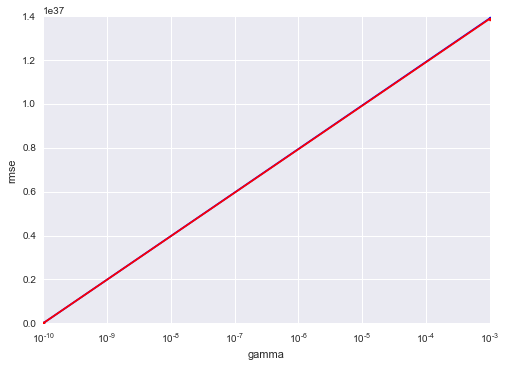

In [8]:
# Stochastic Gradient Descent

# Define the parameters of the algorithm.
max_iters = 10
gammas = np.logspace(-3, -10, 2)
train_losses = []
test_losses = []
for gamma in np.nditer(gammas):
    # Start stochastic gradient descent.
    start_time = datetime.datetime.now()
    initial_w = np.zeros(tx_with_ones_train.shape[1])
    stoch_gradient_w, train_rmse = least_squares_SGD(y_with_ones_train, tx_with_ones_train, initial_w, max_iters, gamma)

    test_mse = compute_loss(y_with_ones_test, tx_with_ones_test, stoch_gradient_w)
    test_rmse = np.sqrt(2*test_mse)    
    
    train_losses = np.append(train_losses, train_rmse)
    test_losses = np.append(test_losses, test_rmse)
    
    end_time = datetime.datetime.now()
    exection_time = (end_time - start_time).total_seconds()
    print("Stochastic Gradient Descent: execution time={t:.3f} seconds. Train RMSE={l}, Test RMSE={tl}".format(t=exection_time, l=train_rmse, tl=test_rmse))

plt.semilogx(gammas, train_losses, marker=".", color='b', label='Train')
plt.semilogx(gammas, test_losses, marker=".", color='r', label='Test')
plt.xlabel("gamma")
plt.ylabel("rmse")
plt.grid(True)

In [9]:
# Least Squares - produce our best keggle result 57th position Mateusz Paluchowski0.74463
start_time = datetime.datetime.now()

least_squares_w, least_squares_loss = least_squares(y_with_ones_train, tx_with_ones_train)
test_mse = compute_loss(y_with_ones_test, tx_with_ones_test, least_squares_w)
test_rmse = np.sqrt(2*test_mse)

end_time = datetime.datetime.now()
exection_time = (end_time - start_time).total_seconds()
print("Lest Squares: execution time={t:.3f} seconds. RMSE Train Loss={l}, Test Loss={tl}".format(t=exection_time, l=least_squares_loss, tl=test_rmse))

Lest Squares: execution time=0.009 seconds. RMSE Train Loss=0.8235433058049058, Test Loss=0.8243813207197653


Ridge Regression: execution time=0.815 seconds.


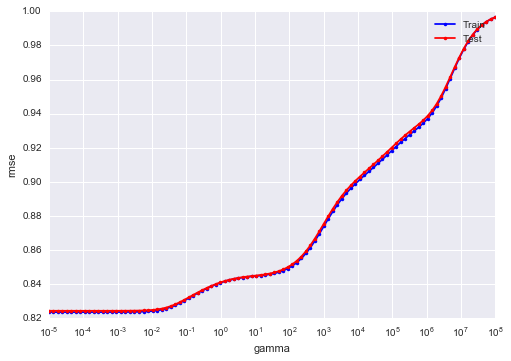

In [10]:
#Ridge Regression

# Define the parameters of the algorithm.
train_losses = []
test_losses = []
lambs = np.logspace(-5, 8, 100)
start_time = datetime.datetime.now()
for lamb in np.nditer(lambs):
    ridge_regression_gradient_w,  ridge_regression_loss = ridge_regression(y_with_ones_train, tx_with_ones_train, lamb)
    
    train_losses = np.append(train_losses, ridge_regression_loss)
    
    test_mse = compute_loss(y_with_ones_test, tx_with_ones_test, ridge_regression_gradient_w)
    test_rmse = np.sqrt(2*test_mse)
    test_losses = np.append(test_losses, test_rmse)
    
end_time = datetime.datetime.now()
exection_time = (end_time - start_time).total_seconds()

print("Ridge Regression: execution time={t:.3f} seconds.".format(t=exection_time))
plt.semilogx(lambs, train_losses, marker=".", color='b', label='Train')
plt.semilogx(lambs, test_losses, marker=".", color='r', label='Test')
plt.xlabel("gamma")
plt.ylabel("rmse")
plt.grid(True)
plt.legend()

#Train RMSE = 0.824233562872 Test RMSE = 1.39476527452

Logistic Regression: execution time=2.345 seconds. Train RMSE=0.9999219369233014, Test RMSE=0.9999233942148438
Logistic Regression: execution time=2.534 seconds. Train RMSE=0.999978273690088, Test RMSE=0.999978679191136
Logistic Regression: execution time=2.720 seconds. Train RMSE=0.999993954153941, Test RMSE=0.9999940669870948
Logistic Regression: execution time=2.892 seconds. Train RMSE=0.9999983176786746, Test RMSE=0.999998349075176
Logistic Regression: execution time=2.785 seconds. Train RMSE=0.9999995318818721, Test RMSE=0.9999995406181356
Logistic Regression: execution time=3.200 seconds. Train RMSE=0.999999869743178, Test RMSE=0.999999872174095
Logistic Regression: execution time=2.795 seconds. Train RMSE=0.9999999637552521, Test RMSE=0.9999999644316692
Logistic Regression: execution time=2.622 seconds. Train RMSE=0.9999999899146826, Test RMSE=0.9999999901028996
Logistic Regression: execution time=2.501 seconds. Train RMSE=0.9999999971937005, Test RMSE=0.999999997246073
Logistic

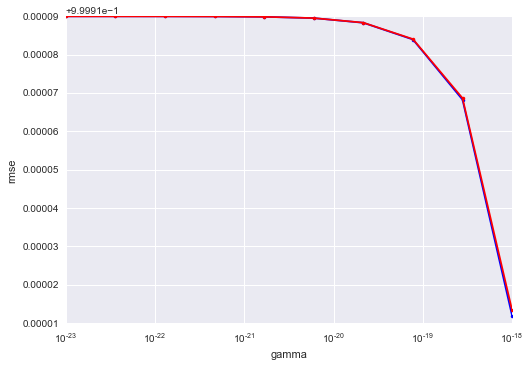

In [11]:
# Logistic Regression using gradient descent

# Define the parameters of the algorithm.
max_iters = 1000
train_losses = []
test_losses = []
weights = np.empty((0,tx_with_ones_train.shape[1]), float)
gammas = np.logspace(-18, -23, 10)# np.logspace(-16, -20, 10)
for gamma in np.nditer(gammas):
    start_time = datetime.datetime.now()
    initial_w = np.zeros((tx_with_ones_train.shape[1],1))
    logistic_regression_w, logistic_regression_loss = logistic_regression(np.array([y_with_ones_train]).T, tx_with_ones_train, initial_w, max_iters, gamma)
    weights = np.vstack((weights, logistic_regression_w.T))

    train_losses = np.append(train_losses, logistic_regression_loss)
    
    test_rmse = compute_RMSE(np.array([y_with_ones_test]).T, tx_with_ones_test, logistic_regression_w)
    test_losses = np.append(test_losses, test_rmse)
    
    end_time = datetime.datetime.now()
    exection_time = (end_time - start_time).total_seconds()
    print("Logistic Regression: execution time={t:.3f} seconds. Train RMSE={l}, Test RMSE={tl}".format(t=exection_time, l=logistic_regression_loss, tl=test_rmse))    

plt.semilogx(gammas, train_losses, marker=".", color='b', label='Train')
plt.semilogx(gammas, test_losses, marker=".", color='r', label='Test')
plt.xlabel("gamma")
plt.ylabel("rmse")
plt.grid(True)

In [12]:
# Regularized Logistic Regression using gradient descent
# Slow

# Define the parameters of the algorithm.
max_iters = 2
gamma = 3.41379310345e-14
lambd = 0.1
    
start_time = datetime.datetime.now()
initial_w = np.zeros((tx_with_ones_train.shape[1],1))
logistic_regression_w, logistic_regression_loss = reg_logistic_regression(np.array([y_with_ones_train]).T, tx_with_ones_train, lambd, initial_w, max_iters, gamma)
test_rmse = compute_RMSE(np.array([y_with_ones_test]).T, tx_with_ones_test, logistic_regression_w)
end_time = datetime.datetime.now()
exection_time = (end_time - start_time).total_seconds()
print("Penalized Logistic Regression: execution time={t:.3f} seconds. Train RMSE={l}, Test RMSE={tl}".format(t=exection_time, l=logistic_regression_loss, tl=test_rmse))

Penalized Logistic Regression: execution time=38.407 seconds. Train RMSE=0.9999999999998683, Test RMSE=0.9999999999998693


In [13]:
# Logistic Regression using newtons method

# Define the parameters of the algorithm.
max_iters = 2

gammas = np.logspace(-18, -23, 1)
for gamma in np.nditer(gammas):
    start_time = datetime.datetime.now()
    
    initial_w = np.zeros((tx_with_ones_train.shape[1],1))
    logistic_regression_newton_w, logistic_regression_newton_loss = learning_by_newton_method(np.array([y_with_ones_train]).T, tx_with_ones_train, initial_w, max_iters, gamma)
    test_rmse = compute_RMSE(np.array([y_with_ones_test]).T, tx_with_ones_test, logistic_regression_newton_w)
    
    end_time = datetime.datetime.now()
    exection_time = (end_time - start_time).total_seconds()
    print("Logistic Regression Newtons Method: execution time={t:.3f} seconds. Train RMSE={l}, Test RMSE={tl}".format(t=exection_time, l=logistic_regression_newton_loss, tl=test_rmse))

Logistic Regression Newtons Method: execution time=28.735 seconds. Train RMSE=1.0, Test RMSE=1.0


In [14]:
# Iteratively reweighted least squares 
# slow for large dataset, can have matrix singularity problems if many iters are run.

# Define the parameters of the algorithm.
max_iters = 1
start_time = datetime.datetime.now()

initial_w = np.zeros((tx_with_ones_train.shape[1],1))
IRLS_w, IRLS_loss  = learning_by_IRLS(np.array([y_with_ones_train[0:10000]]).T, tx_with_ones_train[0:10000], initial_w, max_iters)
test_rmse = compute_RMSE(np.array([y_with_ones_test[0:10000]]).T, tx_with_ones_test[0:10000], IRLS_w)

end_time = datetime.datetime.now()
exection_time = (end_time - start_time).total_seconds()
print("IRLS: execution time={t:.3f} seconds. Train RMSE={l}, Test RMSE={tl}".format(t=exection_time, l=IRLS_loss, tl=test_rmse))

IRLS: execution time=12.168 seconds. Train RMSE=3.3647420253564873, Test RMSE=3.3653639050558395


## Exploratory data analysis

In [15]:
# Lets load it into Pandas data frame since it is easier for data analysis
original_df = pd.DataFrame(tx_train)
# original_df.columns = original_df.columns.astype(str)
original_df.head()

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,100.368,35.831,77.185,4.125,-999.000,-999.000,-999.000,3.022,4.125,64.148,...,2.644,121.919,0.0,-999.000,-999.000,-999.000,-999.000,-999.000,-999.000,0.000
1,76.662,41.597,57.610,20.994,-999.000,-999.000,-999.000,2.627,20.994,59.550,...,-2.083,134.038,0.0,-999.000,-999.000,-999.000,-999.000,-999.000,-999.000,0.000
2,131.952,68.607,97.411,52.580,-999.000,-999.000,-999.000,2.590,3.199,161.768,...,3.125,242.469,1.0,50.139,-1.042,1.579,-999.000,-999.000,-999.000,50.139
3,-999.000,96.005,102.324,51.541,0.324,40.652,-0.026,2.341,1.695,151.687,...,-1.083,160.015,2.0,32.695,0.140,0.484,30.124,-0.184,-0.818,62.819
4,578.983,33.730,182.500,271.064,0.179,94.892,-0.005,2.457,46.723,511.990,...,-0.368,588.863,3.0,196.684,0.144,2.624,67.808,-0.035,1.938,311.419


In [16]:
# Lets display some basic statistics
columns = original_df.columns.to_series()
sparse_columns = np.array([])
for i, column in columns.iteritems():
    value_counts = original_df[original_df.columns[column]].value_counts()
    if -999 in value_counts:
        sparse_columns = np.append(sparse_columns, [column])
        print("Column {c_no} contains {v_no} values equal to -999".format(c_no = column, v_no = value_counts[-999]))

print('Sparse columns:')        
print(sparse_columns)
first10_df = original_df.iloc[:,:10]
first10_df.describe()
# As we can see there are features (columns) which are afected greatly by missing values represented as -999
# for example 4th, 5th, 6th. We should do something about it.

Column 0 contains 7565 values equal to -999
Column 4 contains 35606 values equal to -999
Column 5 contains 35606 values equal to -999
Column 6 contains 35606 values equal to -999
Column 12 contains 35606 values equal to -999
Column 23 contains 19971 values equal to -999
Column 24 contains 19971 values equal to -999
Column 25 contains 19971 values equal to -999
Column 26 contains 35606 values equal to -999
Column 27 contains 35606 values equal to -999
Column 28 contains 35606 values equal to -999
Sparse columns:
[  0.   4.   5.   6.  12.  23.  24.  25.  26.  27.  28.]


,0,1,2,3,4,5,6,7,8,9
count,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,-48.019001,49.261212,80.970996,57.807010,-710.716179,-604.423757,-711.643537,2.368887,18.899221,158.216921
std,404.964131,35.241202,40.549982,62.965181,453.415524,655.508075,451.960081,0.783202,21.275809,115.155845
min,-999.000000,0.000000,7.520000,0.000000,-999.000000,-999.000000,-999.000000,0.264000,0.000000,46.252000
25%,77.991750,19.275750,59.219500,14.377000,-999.000000,-999.000000,-999.000000,1.801000,2.868750,77.550000
50%,104.762500,46.542000,73.517500,38.777000,-999.000000,-999.000000,-999.000000,2.488000,12.409500,120.596000
75%,130.425250,73.722250,91.979500,79.098000,0.463000,81.541500,-4.777500,2.959000,27.639250,200.339750
max,985.102000,571.868000,747.370000,762.806000,7.971000,4543.913000,16.690000,5.684000,371.876000,1513.470000


In [17]:
middle10_df = original_df.iloc[:,10:20]
middle10_df.describe()

,10,11,12,13,14,15,16,17,18,19
count,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,1.438150,-0.129685,-711.276077,38.714103,-0.010635,-0.008631,46.620090,-0.026832,0.034719,41.540613
std,0.838409,1.194243,452.533995,22.592708,1.212823,1.824089,21.671217,1.265438,1.813185,32.383696
min,0.047000,-1.414000,-999.000000,20.000000,-2.498000,-3.141000,26.000000,-2.505000,-3.142000,0.179000
25%,0.882000,-1.371000,-999.000000,24.635500,-0.929000,-1.592000,32.316000,-1.026000,-1.525000,21.353500
50%,1.279000,-0.368000,-999.000000,31.780000,-0.019000,-0.025500,40.507000,-0.064000,0.069000,34.687500
75%,1.777000,1.226000,0.000000,44.749000,0.898000,1.571000,53.627250,0.956000,1.606000,51.647500
max,16.776000,1.414000,1.000000,622.862000,2.497000,3.142000,447.878000,2.490000,3.141000,695.533000


In [18]:
last10_df = original_df.iloc[:,20:]
last10_df.describe()

,20,21,22,23,24,25,26,27,28,29
count,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,-0.004627,209.584688,0.977560,-348.173563,-399.020407,-399.025740,-694.815408,-711.416032,-711.412903,72.882730
std,1.811334,126.028241,0.976788,532.825719,489.296400,489.292124,478.725296,452.315139,452.319793,97.783857
min,-3.141000,17.931000,0.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,0.000000
25%,-1.567000,122.742750,0.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,0.000000
50%,-0.019000,179.917000,1.000000,39.051000,-1.864000,-2.096000,-999.000000,-999.000000,-999.000000,40.615500
75%,1.562000,263.452750,2.000000,75.454000,0.435000,0.510000,33.551500,-2.554000,-2.336000,109.440000
max,3.142000,1603.963000,3.000000,755.235000,4.485000,3.141000,499.032000,4.473000,3.142000,1417.329000


In [19]:
original_df.isnull().sum()

#At least there are no null values! (-999 are our nulls in this case)

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
16    0
17    0
18    0
19    0
20    0
21    0
22    0
23    0
24    0
25    0
26    0
27    0
28    0
29    0
dtype: int64

In [20]:
# Lets replace -999 values for nan's

replaced999_df = original_df.replace(-999, np.nan)
replaced999_df.describe()

//anaconda/lib/python3.5/site-packages/numpy/lib/function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
count,42435.000000,50000.000000,50000.000000,50000.000000,14394.000000,14394.000000,14394.000000,50000.000000,50000.000000,50000.000000,...,50000.000000,50000.000000,50000.000000,30029.000000,30029.000000,30029.000000,14394.000000,14394.000000,14394.000000,50000.000000
mean,121.514904,49.261212,80.970996,57.807010,2.402741,371.627493,-0.818595,2.368887,18.899221,158.216921,...,-0.004627,209.584688,0.977560,84.663188,0.000289,-0.008592,57.636766,-0.028319,-0.017448,72.882730
std,57.121667,35.241202,40.549982,62.965181,1.746793,393.423709,3.579605,0.783202,21.275809,115.155845,...,1.811334,126.028241,0.976788,60.469290,1.780678,1.813766,31.683565,2.034676,1.816138,97.783857
min,10.499000,0.000000,7.520000,0.000000,0.000000,18.593000,-15.783000,0.264000,0.000000,46.252000,...,-3.141000,17.931000,0.000000,30.001000,-4.478000,-3.141000,30.004000,-4.490000,-3.142000,0.000000
25%,NaN,19.275750,59.219500,14.377000,NaN,NaN,NaN,1.801000,2.868750,77.550000,...,-1.567000,122.742750,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
50%,NaN,46.542000,73.517500,38.777000,NaN,NaN,NaN,2.488000,12.409500,120.596000,...,-0.019000,179.917000,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,40.615500
75%,NaN,73.722250,91.979500,79.098000,NaN,NaN,NaN,2.959000,27.639250,200.339750,...,1.562000,263.452750,2.000000,NaN,NaN,NaN,NaN,NaN,NaN,109.440000
max,985.102000,571.868000,747.370000,762.806000,7.971000,4543.913000,16.690000,5.684000,371.876000,1513.470000,...,3.142000,1603.963000,3.000000,755.235000,4.485000,3.141000,499.032000,4.473000,3.142000,1417.329000


In [21]:
mean_filled_df = replaced999_df.copy()
for i, column in np.ndenumerate(sparse_columns):
    col_mean = mean_filled_df[column].mean()
    mean_filled_df[column] = mean_filled_df[column].fillna(col_mean)
mean_filled_df.describe()

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
count,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,...,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,121.514904,49.261212,80.970996,57.807010,2.402741,371.627493,-0.818595,2.368887,18.899221,158.216921,...,-0.004627,209.584688,0.977560,84.663188,0.000289,-0.008592,57.636766,-0.028319,-0.017448,72.882730
std,52.623193,35.241202,40.549982,62.965181,0.937209,211.084105,1.920570,0.783202,21.275809,115.155845,...,1.811334,126.028241,0.976788,46.861632,1.379965,1.405606,16.999222,1.091667,0.974415,97.783857
min,10.499000,0.000000,7.520000,0.000000,0.000000,18.593000,-15.783000,0.264000,0.000000,46.252000,...,-3.141000,17.931000,0.000000,30.001000,-4.478000,-3.141000,30.004000,-4.490000,-3.142000,0.000000
25%,95.325500,19.275750,59.219500,14.377000,2.402741,371.627493,-0.818595,1.801000,2.868750,77.550000,...,-1.567000,122.742750,0.000000,57.517000,-0.423000,-0.546250,57.636766,-0.028319,-0.017448,0.000000
50%,119.576000,46.542000,73.517500,38.777000,2.402741,371.627493,-0.818595,2.488000,12.409500,120.596000,...,-0.019000,179.917000,1.000000,84.663188,0.000289,-0.008592,57.636766,-0.028319,-0.017448,40.615500
75%,130.425250,73.722250,91.979500,79.098000,2.402741,371.627493,-0.818595,2.959000,27.639250,200.339750,...,1.562000,263.452750,2.000000,84.663188,0.435000,0.510000,57.636766,-0.028319,-0.017448,109.440000
max,985.102000,571.868000,747.370000,762.806000,7.971000,4543.913000,16.690000,5.684000,371.876000,1513.470000,...,3.142000,1603.963000,3.000000,755.235000,4.485000,3.141000,499.032000,4.473000,3.142000,1417.329000


In [22]:
mean_filled_normalized_df = (mean_filled_df - mean_filled_df.mean()) / mean_filled_df.std()
mean_filled_normalized_df.describe()

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
count,5.000000e+04,5.000000e+04,5.000000e+04,5.000000e+04,5.000000e+04,5.000000e+04,5.000000e+04,5.000000e+04,5.000000e+04,5.000000e+04,...,5.000000e+04,5.000000e+04,5.000000e+04,5.000000e+04,5.000000e+04,5.000000e+04,5.000000e+04,5.000000e+04,5.000000e+04,5.000000e+04
mean,2.804131e-13,1.076902e-14,-2.045613e-15,1.961206e-15,1.530042e-12,1.156779e-12,7.771060e-15,4.352577e-16,1.516693e-15,3.714172e-15,...,-4.028777e-17,-3.512708e-15,6.028209e-15,-2.430774e-13,-7.744237e-17,-2.867655e-16,1.066669e-12,-1.997807e-15,7.995353e-15,9.028955e-16
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,...,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-2.109638e+00,-1.397830e+00,-1.811369e+00,-9.180790e-01,-2.563720e+00,-1.672483e+00,-7.791648e+00,-2.687541e+00,-8.882962e-01,-9.722904e-01,...,-1.731527e+00,-1.520720e+00,-1.000790e+00,-1.166459e+00,-3.245220e+00,-2.228510e+00,-1.625531e+00,-4.087034e+00,-3.206594e+00,-7.453452e-01
25%,-4.976780e-01,-8.508638e-01,-5.364120e-01,-6.897465e-01,1.529089e-12,1.153650e-12,9.595955e-15,-7.250836e-01,-7.534600e-01,-7.005022e-01,...,-8.625539e-01,-6.890673e-01,-1.000790e+00,-5.792839e-01,-3.067387e-01,-3.825100e-01,1.065445e-12,-3.162227e-15,7.327601e-15,-7.453452e-01
50%,-3.684506e-02,-7.716002e-02,-1.838101e-01,-3.022307e-01,1.529089e-12,1.153650e-12,9.595955e-15,1.520850e-01,-3.050282e-01,-3.266957e-01,...,-7.935037e-03,-2.354051e-01,2.297325e-02,-2.350198e-13,-1.045732e-16,-4.097365e-16,1.065445e-12,-3.162227e-15,7.327601e-15,-3.299852e-01
75%,1.693235e-01,6.941034e-01,2.714799e-01,3.381391e-01,1.529089e-12,1.153650e-12,9.595955e-15,7.534625e-01,4.107965e-01,3.657898e-01,...,8.649024e-01,4.274285e-01,1.046736e+00,-2.350198e-13,3.150164e-01,3.689450e-01,1.065445e-12,-3.162227e-15,7.327601e-15,3.738579e-01
max,1.641077e+01,1.482943e+01,1.643401e+01,1.119665e+01,5.941321e+00,1.976599e+01,9.116354e+00,4.232770e+00,1.659052e+01,1.176886e+01,...,1.737188e+00,1.106401e+01,2.070500e+00,1.430961e+01,3.249874e+00,2.240735e+00,2.596561e+01,4.123343e+00,3.242406e+00,1.374916e+01


In [23]:
replaced999_df.describe()

//anaconda/lib/python3.5/site-packages/numpy/lib/function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
count,42435.000000,50000.000000,50000.000000,50000.000000,14394.000000,14394.000000,14394.000000,50000.000000,50000.000000,50000.000000,...,50000.000000,50000.000000,50000.000000,30029.000000,30029.000000,30029.000000,14394.000000,14394.000000,14394.000000,50000.000000
mean,121.514904,49.261212,80.970996,57.807010,2.402741,371.627493,-0.818595,2.368887,18.899221,158.216921,...,-0.004627,209.584688,0.977560,84.663188,0.000289,-0.008592,57.636766,-0.028319,-0.017448,72.882730
std,57.121667,35.241202,40.549982,62.965181,1.746793,393.423709,3.579605,0.783202,21.275809,115.155845,...,1.811334,126.028241,0.976788,60.469290,1.780678,1.813766,31.683565,2.034676,1.816138,97.783857
min,10.499000,0.000000,7.520000,0.000000,0.000000,18.593000,-15.783000,0.264000,0.000000,46.252000,...,-3.141000,17.931000,0.000000,30.001000,-4.478000,-3.141000,30.004000,-4.490000,-3.142000,0.000000
25%,NaN,19.275750,59.219500,14.377000,NaN,NaN,NaN,1.801000,2.868750,77.550000,...,-1.567000,122.742750,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
50%,NaN,46.542000,73.517500,38.777000,NaN,NaN,NaN,2.488000,12.409500,120.596000,...,-0.019000,179.917000,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,40.615500
75%,NaN,73.722250,91.979500,79.098000,NaN,NaN,NaN,2.959000,27.639250,200.339750,...,1.562000,263.452750,2.000000,NaN,NaN,NaN,NaN,NaN,NaN,109.440000
max,985.102000,571.868000,747.370000,762.806000,7.971000,4543.913000,16.690000,5.684000,371.876000,1513.470000,...,3.142000,1603.963000,3.000000,755.235000,4.485000,3.141000,499.032000,4.473000,3.142000,1417.329000


In [24]:
#_ = pd.scatter_matrix(replaced999_df.loc[:,0:10], figsize=(20,20), diagonal='hist')

In [25]:
#_ = pd.scatter_matrix(replaced999_df.loc[:,10:20], figsize=(20,20), diagonal='hist')

In [26]:
#_ = pd.scatter_matrix(replaced999_df.loc[:,20:30], figsize=(20,20), diagonal='hist')

In [27]:
# Lets sum all sprase columns and combine it into new one
combined_df = replaced999_df.copy()
combined_df['combined'] = replaced999_df[sparse_columns].sum(axis=1)
combined_df.describe()

//anaconda/lib/python3.5/site-packages/numpy/lib/function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


,0,1,2,3,4,5,6,7,8,9,...,21,22,23,24,25,26,27,28,29,combined
count,42435.000000,50000.000000,50000.000000,50000.000000,14394.000000,14394.000000,14394.000000,50000.000000,50000.000000,50000.000000,...,50000.000000,50000.000000,30029.000000,30029.000000,30029.000000,14394.000000,14394.000000,14394.000000,50000.000000,50000.000000
mean,121.514904,49.261212,80.970996,57.807010,2.402741,371.627493,-0.818595,2.368887,18.899221,158.216921,...,209.584688,0.977560,84.663188,0.000289,-0.008592,57.636766,-0.028319,-0.017448,72.882730,278.122997
std,57.121667,35.241202,40.549982,62.965181,1.746793,393.423709,3.579605,0.783202,21.275809,115.155845,...,126.028241,0.976788,60.469290,1.780678,1.813766,31.683565,2.034676,1.816138,97.783857,340.741347
min,10.499000,0.000000,7.520000,0.000000,0.000000,18.593000,-15.783000,0.264000,0.000000,46.252000,...,17.931000,0.000000,30.001000,-4.478000,-3.141000,30.004000,-4.490000,-3.142000,0.000000,0.000000
25%,NaN,19.275750,59.219500,14.377000,NaN,NaN,NaN,1.801000,2.868750,77.550000,...,122.742750,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,99.570500
50%,NaN,46.542000,73.517500,38.777000,NaN,NaN,NaN,2.488000,12.409500,120.596000,...,179.917000,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,40.615500,158.640500
75%,NaN,73.722250,91.979500,79.098000,NaN,NaN,NaN,2.959000,27.639250,200.339750,...,263.452750,2.000000,NaN,NaN,NaN,NaN,NaN,NaN,109.440000,325.717250
max,985.102000,571.868000,747.370000,762.806000,7.971000,4543.913000,16.690000,5.684000,371.876000,1513.470000,...,1603.963000,3.000000,755.235000,4.485000,3.141000,499.032000,4.473000,3.142000,1417.329000,4849.668000


In [28]:
value_counts = combined_df['combined'].value_counts()
np.nan in value_counts

#No NaN's! Impressive!

False

In [29]:
zero_filled_df = replaced999_df.fillna(0)
zero_filled_df.describe()

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
count,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,...,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,103.129699,49.261212,80.970996,57.807010,0.691701,106.984123,-0.235657,2.368887,18.899221,158.216921,...,-0.004627,209.584688,0.977560,50.847017,0.000173,-0.005160,16.592472,-0.008152,-0.005023,72.882730
std,68.302994,35.241202,40.549982,62.965181,1.435936,269.943891,1.956007,0.783202,21.275809,115.155845,...,1.811334,126.028241,0.976788,62.573943,1.379965,1.405613,31.145039,1.091743,0.974447,97.783857
min,0.000000,0.000000,7.520000,0.000000,0.000000,0.000000,-15.783000,0.264000,0.000000,46.252000,...,-3.141000,17.931000,0.000000,0.000000,-4.478000,-3.141000,0.000000,-4.490000,-3.142000,0.000000
25%,77.991750,19.275750,59.219500,14.377000,0.000000,0.000000,0.000000,1.801000,2.868750,77.550000,...,-1.567000,122.742750,0.000000,0.000000,-0.423000,-0.546250,0.000000,0.000000,0.000000,0.000000
50%,104.762500,46.542000,73.517500,38.777000,0.000000,0.000000,0.000000,2.488000,12.409500,120.596000,...,-0.019000,179.917000,1.000000,39.051000,0.000000,0.000000,0.000000,0.000000,0.000000,40.615500
75%,130.425250,73.722250,91.979500,79.098000,0.463000,81.541500,0.000000,2.959000,27.639250,200.339750,...,1.562000,263.452750,2.000000,75.454000,0.435000,0.510000,33.551500,0.000000,0.000000,109.440000
max,985.102000,571.868000,747.370000,762.806000,7.971000,4543.913000,16.690000,5.684000,371.876000,1513.470000,...,3.142000,1603.963000,3.000000,755.235000,4.485000,3.141000,499.032000,4.473000,3.142000,1417.329000


In [30]:
droped_nans_df = combined_df.dropna(axis=1, thresh=50000)
print(droped_nans_df.columns.shape)

(20,)


In [31]:
#_ = pd.scatter_matrix(droped_nans_df, figsize=(20,20), diagonal='hist')

In [32]:
zero_filled_normalized_df = (zero_filled_df - zero_filled_df.mean()) / zero_filled_df.std()
zero_filled_normalized_df.describe()

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
count,5.000000e+04,5.000000e+04,5.000000e+04,5.000000e+04,5.000000e+04,5.000000e+04,5.000000e+04,5.000000e+04,5.000000e+04,5.000000e+04,...,5.000000e+04,5.000000e+04,5.000000e+04,5.000000e+04,5.000000e+04,5.000000e+04,5.000000e+04,5.000000e+04,5.000000e+04,5.000000e+04
mean,2.039626e-15,1.076902e-14,-2.045613e-15,1.961206e-15,-9.786449e-16,-1.782512e-15,3.622931e-15,4.352577e-16,1.516693e-15,3.714172e-15,...,-4.028777e-17,-3.512708e-15,6.028209e-15,-5.208691e-15,-3.881774e-16,-2.490222e-16,2.044875e-15,5.450080e-16,-3.831012e-16,9.028955e-16
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,...,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-1.509885e+00,-1.397830e+00,-1.811369e+00,-9.180790e-01,-4.817074e-01,-3.963199e-01,-7.948509e+00,-2.687541e+00,-8.882962e-01,-9.722904e-01,...,-1.731527e+00,-1.520720e+00,-1.000790e+00,-8.125909e-01,-3.245136e+00,-2.230942e+00,-5.327485e-01,-4.105224e+00,-3.219239e+00,-7.453452e-01
25%,-3.680358e-01,-8.508638e-01,-5.364120e-01,-6.897465e-01,-4.817074e-01,-3.963199e-01,1.204787e-01,-7.250836e-01,-7.534600e-01,-7.005022e-01,...,-8.625539e-01,-6.890673e-01,-1.000790e+00,-8.125909e-01,-3.066552e-01,-3.849496e-01,-5.327485e-01,7.467310e-03,5.154577e-03,-7.453452e-01
50%,2.390526e-02,-7.716002e-02,-1.838101e-01,-3.022307e-01,-4.817074e-01,-3.963199e-01,1.204787e-01,1.520850e-01,-3.050282e-01,-3.266957e-01,...,-7.935037e-03,-2.354051e-01,2.297325e-02,-1.885133e-01,-1.255829e-04,3.670926e-03,-5.327485e-01,7.467310e-03,5.154577e-03,-3.299852e-01
75%,3.996245e-01,6.941034e-01,2.714799e-01,3.381391e-01,-1.592697e-01,-9.425152e-02,1.204787e-01,7.534625e-01,4.107965e-01,3.657898e-01,...,8.649024e-01,4.274285e-01,1.046736e+00,3.932465e-01,3.150999e-01,3.665020e-01,5.445178e-01,7.467310e-03,5.154577e-03,3.738579e-01
max,1.291264e+01,1.482943e+01,1.643401e+01,1.119665e+01,5.069376e+00,1.643649e+01,8.653166e+00,4.232770e+00,1.659052e+01,1.176886e+01,...,1.737188e+00,1.106401e+01,2.070500e+00,1.125689e+01,3.249958e+00,2.238284e+00,1.549009e+01,4.104587e+00,3.229549e+00,1.374916e+01


In [33]:
normalized_df = (droped_nans_df - droped_nans_df.mean()) / droped_nans_df.std()
normalized_df.describe()

,1,2,3,7,8,9,10,11,13,14,15,16,17,18,19,20,21,22,29,combined
count,5.000000e+04,5.000000e+04,5.000000e+04,5.000000e+04,5.000000e+04,5.000000e+04,5.000000e+04,5.000000e+04,5.000000e+04,5.000000e+04,5.000000e+04,5.000000e+04,5.000000e+04,5.000000e+04,5.000000e+04,5.000000e+04,5.000000e+04,5.000000e+04,5.000000e+04,5.000000e+04
mean,1.076902e-14,-2.045613e-15,1.961206e-15,4.352577e-16,1.516693e-15,3.714172e-15,8.531882e-15,-1.313456e-15,5.003371e-15,5.719425e-17,-6.214335e-17,3.350585e-14,-7.338130e-17,1.444178e-17,2.341273e-15,-4.028777e-17,-3.512708e-15,6.028209e-15,9.028955e-16,-4.022415e-15
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-1.397830e+00,-1.811369e+00,-9.180790e-01,-2.687541e+00,-8.882962e-01,-9.722904e-01,-1.659274e+00,-1.075422e+00,-8.283249e-01,-2.050889e+00,-1.717224e+00,-9.514966e-01,-1.958348e+00,-1.752011e+00,-1.277236e+00,-1.731527e+00,-1.520720e+00,-1.000790e+00,-7.453452e-01,-8.162291e-01
25%,-8.508638e-01,-5.364120e-01,-6.897465e-01,-7.250836e-01,-7.534600e-01,-7.005022e-01,-6.633397e-01,-1.039415e+00,-6.231481e-01,-7.572130e-01,-8.680328e-01,-6.600501e-01,-7.895827e-01,-8.602100e-01,-6.233727e-01,-8.625539e-01,-6.890673e-01,-1.000790e+00,-7.453452e-01,-5.240118e-01
50%,-7.716002e-02,-1.838101e-01,-3.022307e-01,1.520850e-01,-3.050282e-01,-3.266957e-01,-1.898238e-01,-1.995532e-01,-3.069177e-01,-6.897477e-03,-9.247937e-03,-2.820834e-01,-2.937175e-02,1.890627e-02,-2.116223e-01,-7.935037e-03,-2.354051e-01,2.297325e-02,-3.299852e-01,-3.506545e-01
75%,6.941034e-01,2.714799e-01,3.381391e-01,7.534625e-01,4.107965e-01,3.657898e-01,4.041584e-01,1.135183e+00,2.671170e-01,7.491897e-01,8.659835e-01,3.233395e-01,7.766731e-01,8.665861e-01,3.120980e-01,8.649024e-01,4.274285e-01,1.046736e+00,3.738579e-01,1.396785e-01
max,1.482943e+01,1.643401e+01,1.119665e+01,4.232770e+00,1.659052e+01,1.176886e+01,1.829400e+01,1.292605e+00,2.585559e+01,2.067601e+00,1.727235e+00,1.851571e+01,1.988901e+00,1.713163e+00,2.019511e+01,1.737188e+00,1.106401e+01,2.070500e+00,1.374916e+01,1.341647e+01


In [34]:
# Lets do exactly the same but for test dataset
original_test_df = pd.DataFrame(tx_test)
replaced999_test_df = original_test_df.replace(-999, np.nan)
mean_filled_test_df = replaced999_test_df.copy()
for i, column in np.ndenumerate(sparse_columns):
    col_mean = mean_filled_test_df[column].mean()
    mean_filled_test_df[column] = mean_filled_test_df[column].fillna(col_mean)
mean_filled_normalized_test_df = (mean_filled_test_df - mean_filled_test_df.mean()) / mean_filled_test_df.std()
combined_test_df = replaced999_test_df.copy()
combined_test_df['combined'] = combined_test_df[sparse_columns].sum(axis=1)
droped_nans_test_df = combined_test_df.dropna(axis=1, thresh=200000)
normalized_test_df = (droped_nans_test_df - droped_nans_test_df.mean()) / droped_nans_test_df.std()

zero_filled_test_df = replaced999_test_df.fillna(0)
zero_filled_test_normalized_df = (zero_filled_test_df - zero_filled_test_df.mean()) / zero_filled_test_df.std()
#Verify we left same columns
print(droped_nans_df.columns == droped_nans_test_df.columns)

[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True]


In [35]:
# And for prediction dataset
DATA_PRED_PATH = '../data/test.csv'
_, tx_pred, ids_pred = load_csv_data(DATA_PRED_PATH)

original_pred_df = pd.DataFrame(tx_pred)
replaced999_pred_df = original_pred_df.replace(-999, np.nan)
mean_filled_pred_df = replaced999_pred_df.copy()
for i, column in np.ndenumerate(sparse_columns):
    col_mean = mean_filled_pred_df[column].mean()
    mean_filled_pred_df[column] = mean_filled_pred_df[column].fillna(col_mean)
mean_filled_normalized_pred_df = (mean_filled_pred_df - mean_filled_pred_df.mean()) / mean_filled_pred_df.std()
combined_pred_df = replaced999_pred_df.copy()
combined_pred_df['combined'] = combined_pred_df[sparse_columns].sum(axis=1)
droped_nans_pred_df = combined_pred_df.dropna(axis=1, thresh=500000)
normalized_pred_df = (droped_nans_pred_df - droped_nans_pred_df.mean()) / droped_nans_pred_df.std()

zero_filled_pred_df = replaced999_pred_df.fillna(0)
zero_filled_pred_normalized_df = (zero_filled_pred_df - zero_filled_pred_df.mean()) / zero_filled_pred_df.std()
#Verify we left same columns
print(droped_nans_df.columns == droped_nans_pred_df.columns)

[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True]


In [36]:
# Lets change it back to numpy array
new_tx_train = normalized_df.as_matrix()
new_tx_test = normalized_test_df.as_matrix()
new_tx_pred = normalized_pred_df.as_matrix()

new_meanfilled_tx_train = mean_filled_normalized_df.as_matrix()
new_meanfilled_tx_test = mean_filled_normalized_test_df.as_matrix()
new_meanfilled_tx_pred = mean_filled_normalized_pred_df.as_matrix()

new_zerofilled_tx_train = zero_filled_normalized_df.as_matrix()[:,0:30]
new_zerofilled_tx_test = zero_filled_test_normalized_df.as_matrix()[:,0:30]
new_zerofilled_tx_pred = zero_filled_pred_normalized_df.as_matrix()[:,0:30]

In [37]:
# Save/load for future to/from csv
# np.savetxt("../data/new_tx_train.csv", new_tx_train, delimiter=",")
# np.savetxt("../data/new_tx_test.csv", new_tx_test, delimiter=",")
# np.savetxt("../data/new_zerofilled_tx_train.csv", new_zerofilled_tx_train, delimiter=",")
# np.savetxt("../data/new_zerofilled_tx_test.csv", new_zerofilled_tx_test, delimiter=",")
# np.savetxt("../data/new_meanfilled_tx_train.csv", new_meanfilled_tx_train, delimiter=",")
# np.savetxt("../data/new_meanfilled_tx_test.csv", new_meanfilled_tx_test, delimiter=",")

# new_tx_train = np.loadtxt("../data/new_tx_train.csv", delimiter=",")
# new_tx_test = np.loadtxt("../data/new_tx_test.csv", delimiter=",")
# new_zerofilled_tx_train = np.loadtxt("../data/new_zerofilled_tx_train.csv", delimiter=",")
# new_zerofilled_tx_test = np.loadtxt("../data/new_zerofilled_tx_test.csv", delimiter=",")
# new_meanfilled_tx_train = np.loadtxt("../data/new_meanfilled_tx_train.csv", delimiter=",")
# new_meanfilled_tx_test = np.loadtxt("../data/new_meanfilled_tx_test.csv", delimiter=",")

In [38]:
train_datasets = [tx_train, new_meanfilled_tx_train, new_zerofilled_tx_train, new_tx_train]
test_datasets = [tx_test, new_meanfilled_tx_test, new_zerofilled_tx_test, new_tx_test]
datasets_names = ['Original/Raw', 'Mean filled', 'Zero filled', 'NaN dropped']

Logistic Regression for Original/Raw: execution time=2.594 seconds.
Logistic Regression for Mean filled: execution time=2.451 seconds.
Logistic Regression for Zero filled: execution time=2.526 seconds.
Logistic Regression for NaN dropped: execution time=1.861 seconds.


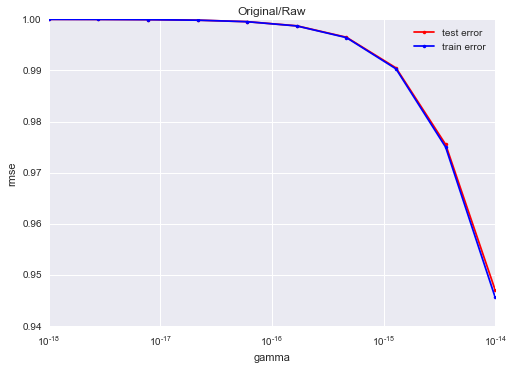

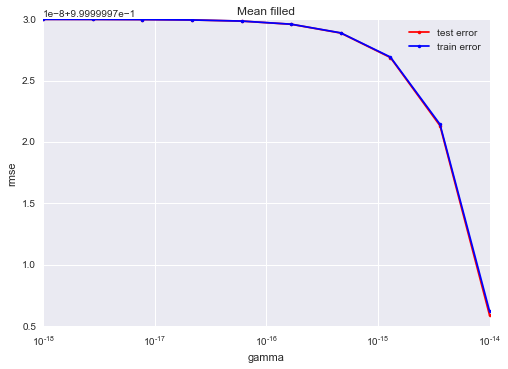

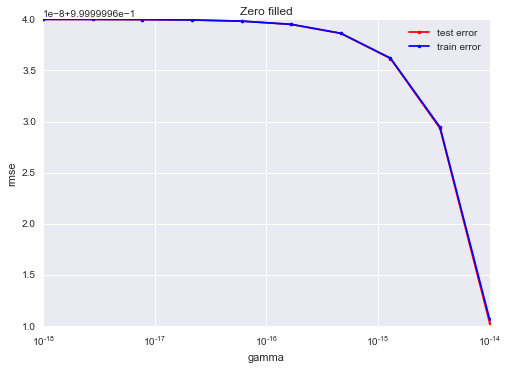

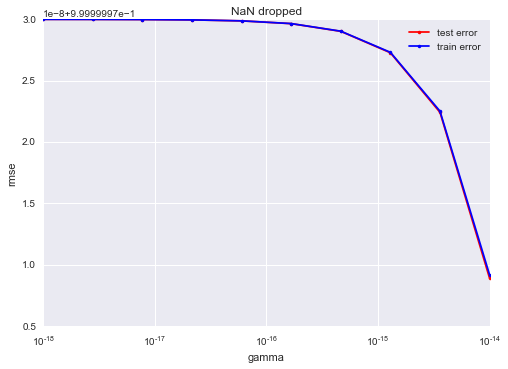

In [39]:
max_iters = 100
gammas = np.logspace(-14, -18, 10)
for i in range(len(train_datasets)):
     logistic_regression_dataset_gammas_test(y_train, y_test, train_datasets[i], test_datasets[i], max_iters, gammas, datasets_names[i], i)

Logistic Regression: execution time=2.708 seconds. RMSE Loss=0.999999762066734
Logistic Regression: execution time=2.532 seconds. RMSE Loss=0.9999999144911625
Logistic Regression: execution time=2.919 seconds. RMSE Loss=0.9999999692697099
Logistic Regression: execution time=2.508 seconds. RMSE Loss=0.9999999889561054
Logistic Regression: execution time=2.527 seconds. RMSE Loss=0.99999999603103
Logistic Regression: execution time=2.708 seconds. RMSE Loss=0.9999999985736261
Logistic Regression: execution time=2.391 seconds. RMSE Loss=0.9999999994873878
Logistic Regression: execution time=2.297 seconds. RMSE Loss=0.9999999998157767
Logistic Regression: execution time=2.285 seconds. RMSE Loss=0.9999999999337935
Logistic Regression: execution time=2.338 seconds. RMSE Loss=0.9999999999762067


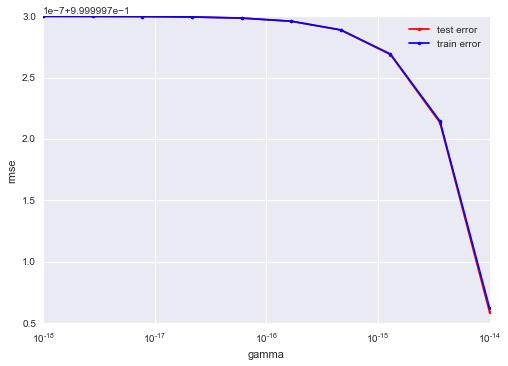

In [40]:
# Try Logistic regression
max_iters = 1000
gammas = np.logspace(-14, -18, 10)# np.logspace(-16, -20, 10)
train_losses = []
test_losses = []
weights = np.empty((0,new_meanfilled_tx_train.shape[1]), float)
for gamma in np.nditer(gammas):
    
    start_time = datetime.datetime.now()
    initial_w = np.zeros((new_meanfilled_tx_train.shape[1],1))
    logistic_regression_w, logistic_regression_loss = logistic_regression(np.array([y_train]).T, new_meanfilled_tx_train, initial_w, max_iters, gamma)
    
    train_losses = np.append(train_losses, logistic_regression_loss)
    test_mse = compute_loss(y_test, new_meanfilled_tx_test, logistic_regression_w[:,0])
    test_rmse = np.sqrt(2*test_mse)
    test_losses = np.append(test_losses, test_rmse)
    
    end_time = datetime.datetime.now()
    exection_time = (end_time - start_time).total_seconds()
    
    weights = np.vstack((weights, logistic_regression_w.T))
    print("Logistic Regression: execution time={t:.3f} seconds. RMSE Loss={l}".format(t=exection_time, l=logistic_regression_loss))


plt.semilogx(gammas, test_losses, marker=".", color='r', label='test error')
plt.semilogx(gammas, train_losses, marker=".", color='b', label='train error')
plt.xlabel("gamma")
plt.ylabel("rmse")
plt.grid(True)
plt.legend()

In [41]:
# Try Least Squares 
start_time = datetime.datetime.now()
least_squares_w, least_squares_loss = least_squares(y_train, new_tx_train)
end_time = datetime.datetime.now()

test_mse = compute_loss(y_test, new_tx_test, least_squares_w)
test_rmse = np.sqrt(2*test_mse)

exection_time = (end_time - start_time).total_seconds()
print("Lest Squares: execution time={t:.3f} seconds. RMSE Train Loss={l}, Test Loss={tl}".format(t=exection_time, l=least_squares_loss, tl=test_rmse))

Lest Squares: execution time=0.004 seconds. RMSE Train Loss=0.8860634035578199, Test Loss=7.989319435918762


## Cross validation


[ 0.82389659  0.8246067   0.8243188   0.82361836  0.82460442  0.82432207
  0.82429457  0.82448319  0.82419475  0.82400629]
[ 0.82737929  0.82100899  0.82358468  0.82992652  0.82104344  0.82366705
  0.82381502  0.82210155  0.82469649  0.82641465]
Cross Validation: execution time=2.283 seconds.


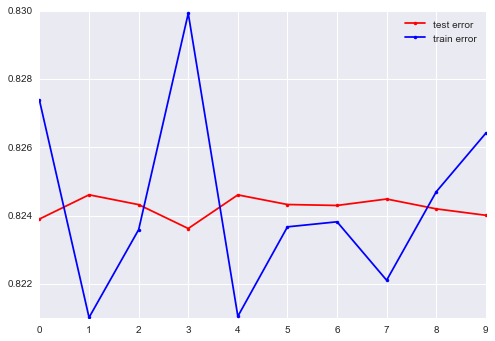

In [42]:
from plots import cross_validation_visualization

subset_y = y
subset_tx = tx


# Define the parameters of the algorithm.
seed = 1
k_fold = 10
lambdas = np.logspace(-16, 2, 1)

rmse_tr = []
rmse_te = []
# weights = np.empty((0,subset_tx.shape[1]), float)
start_time = datetime.datetime.now()

for lambd in np.nditer(lambdas):
    loss_tr, loss_te = cross_validation_mat(subset_y, subset_tx, k_fold, seed, lambd)
    rmse_tr = np.append(rmse_tr, loss_tr)
    rmse_te = np.append(rmse_te, loss_te)
#     weights = np.vstack((weights, w))
        
end_time = datetime.datetime.now()
exection_time = (end_time - start_time).total_seconds()

print("Cross Validation: execution time={t:.3f} seconds.".format(t=exection_time))
#cross_validation_visualization(lambdas, rmse_tr, rmse_te)

## Generate predictions and save ouput in csv format for submission:

In [ ]:
OUTPUT_PATH = '../data/logistic_regression_cross_validation_submission.csv' # TODO: fill in desired name of output file for submission
weights_pred = least_squares_w
y_pred = predict_labels(weights_pred, new_tx_pred)
create_csv_submission(ids_pred, y_pred, OUTPUT_PATH)

http://inclass.kaggle.com/c/epfml-project-1

In [ ]:
# Delete train.csv such that github accepts push
os.remove('../data/test.csv')